In [94]:
#3rd part
#reading cleaned data files from 2011 to 2015
import pandas as pd                                                             
import numpy as np                                                # data processing, CSV file I/O                                                               
rd = pd.read_csv('/Users/srivatsasrinathmurthy/Desktop/2011-15.csv')
rd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11227517,JB138481,2/10/2013 0:00,071XX S LAFAYETTE AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,6.0,69.0,2,NaN,NaN,2013,2/11/2018 15:57,NaN,NaN,NaN
1,11227503,JB146383,1/1/2015 0:01,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,13.0,65.0,17,NaN,NaN,2015,4/12/2019 16:00,NaN,NaN,NaN
2,11227247,JB147078,1/1/2012 9:00,105XX S INDIANAPOLIS AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,10.0,52.0,11,NaN,NaN,2012,2/11/2018 15:57,NaN,NaN,NaN
3,11028056,JA359834,10/15/2014 15:00,047XX S PULASKI RD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,PARKING LOT/GARAGE(NON.RESID.),False,False,...,14.0,57.0,11,NaN,NaN,2014,7/24/2017 15:54,NaN,NaN,NaN
4,11028299,JA360073,5/30/2015 0:00,074XX S HARVARD AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,True,...,17.0,69.0,2,NaN,NaN,2015,5/15/2018 15:52,NaN,NaN,NaN


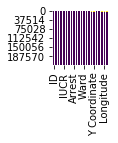

In [95]:
import matplotlib.pyplot as plot
import seaborn as sea
#looking at all the null values that are present in our dataset
plot.figure(figsize=(1,1))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')                          

In [96]:
rd = rd.dropna()
rd = rd.drop(['ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
#top 10 value counts available in terms of primary type of Crime
pd.value_counts(rd['Primary Type'])[:10]

THEFT                  48332
BATTERY                40716
CRIMINAL DAMAGE        24092
NARCOTICS              16405
ASSAULT                14329
OTHER OFFENSE          14049
DECEPTIVE PRACTICE     12625
BURGLARY               11072
MOTOR VEHICLE THEFT     8175
ROBBERY                 8101
Name: Primary Type, dtype: int64

In [97]:
#top 10 value counts available in terms of location of Crime
pd.value_counts(rd['Location Description'])[:10] 

STREET                            49784
RESIDENCE                         33412
APARTMENT                         28062
SIDEWALK                          23586
OTHER                              8847
PARKING LOT/GARAGE(NON.RESID.)     5994
RESIDENTIAL YARD (FRONT/BACK)      4871
ALLEY                              4751
SMALL RETAIL STORE                 4446
RESTAURANT                         4116
Name: Location Description, dtype: int64

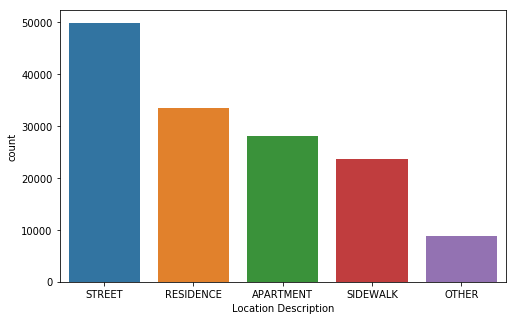

In [98]:
#location description and semantics
plot.figure(figsize = (8, 5))   
sea.countplot(x= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:5].index)

In [99]:
import folium             #to create several types of Leaflet maps
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB Positron")
locs = rd.groupby('Community Area').first()
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1.0,42.017108,-87.668847,STREET,False
2.0,41.997724,-87.690187,STREET,False
3.0,41.966299,-87.658046,SIDEWALK,True
4.0,41.969389,-87.700489,OTHER,True
5.0,41.942291,-87.688252,BANK,False


In [100]:
#Using 1 location in each of the particular community area
for i in range(len(new_locs)):            
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = False).add_to(c_m)

In [101]:
c_m       #display the map

In [102]:
uniq_locs = rd['Location'].value_counts()
uniq_locs.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.742710224, -87.634088181)', '(41.897895128, -87.624096605)',
       '(41.979006297, -87.906463155)', '(41.976290414, -87.905227221)',
       '(41.909664252, -87.742728815)', '(41.868541914, -87.639235361)',
       '(41.976762981, -87.900983721)', '(42.019399237, -87.675049485)',
       ...
       '(41.866849027, -87.772949011)', '(42.005407538, -87.668537911)',
       '(41.708090243, -87.622388926)', '(41.802126073, -87.70870977)',
       '(41.878011626, -87.671662878)', '(41.956942374, -87.757983811)',
       '(41.726136224, -87.573819759)', '(41.94578679, -87.775147492)',
       '(41.764079768, -87.671082671)', '(41.789790172, -87.653546865)'],
      dtype='object', length=116332)

In [103]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})  #A simple criminal rate index dataFrame
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",380
1,"(41.754592961, -87.741528537)",321
2,"(41.742710224, -87.634088181)",215
3,"(41.897895128, -87.624096605)",206
4,"(41.979006297, -87.906463155)",166


In [104]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [105]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor)
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [106]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],        # Total crime rate
                        zoom_start=11,
                        tiles="CartoDB Positron")

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)
    

In [107]:
crime_map      #display the map

In [108]:
rdt = rd[rd['Primary Type'] == 'THEFT']     #Closer look at thefts

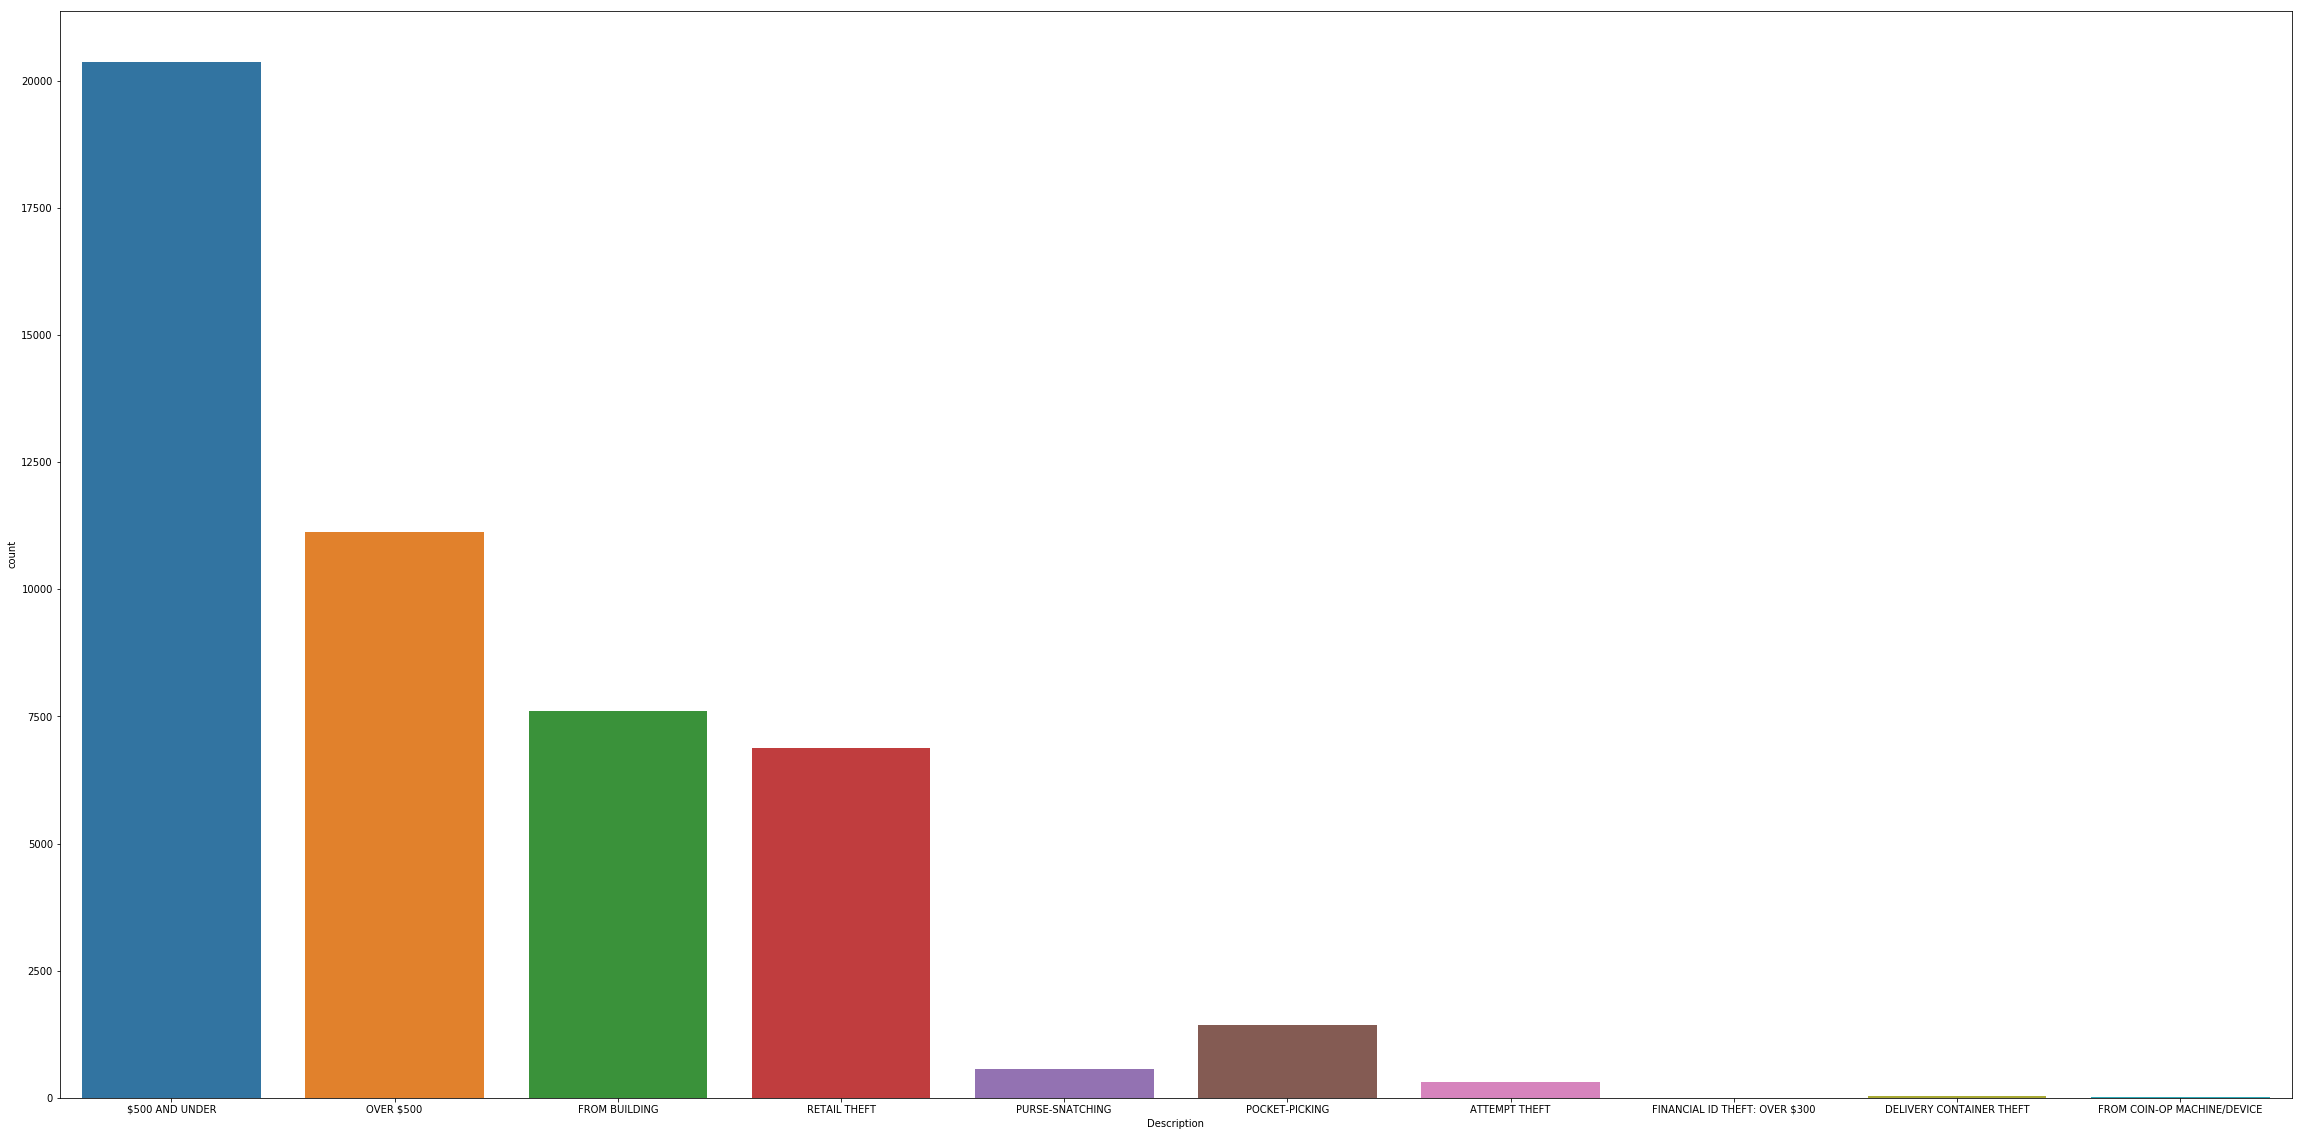

In [109]:
plot.figure(figsize = (40, 20))
sea.countplot(x = rdt['Description'])

In [110]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)   #sorted array of counts
rdt_data.head()

,Counts,Description
0,20364,$500 AND UNDER
1,11129,OVER $500
2,7610,FROM BUILDING
3,6883,RETAIL THEFT
4,1436,POCKET-PICKING


In [111]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [114]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [115]:
theft_in_months.head()

,thefts,month
11,4594.0,1
10,5191.0,2
9,5245.0,3
7,5464.0,4
5,5019.0,5


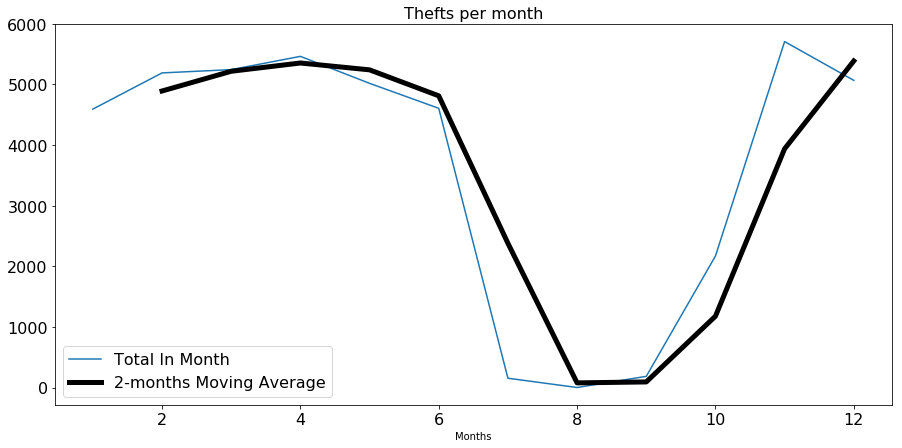

In [116]:
#graph to analyse the monthly trend of theft
plt.figure(figsize = (15,7))       
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [117]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2015-12-31 23:50:00
2011-01-01 08:00:00


In [118]:
rdt['Date'].iloc[0].date()

datetime.date(2015, 3, 20)

In [119]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

In [120]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

In [122]:
#having a closer look at battery crimes
rdt = rd[rd['Primary Type'] == 'BATTERY']     

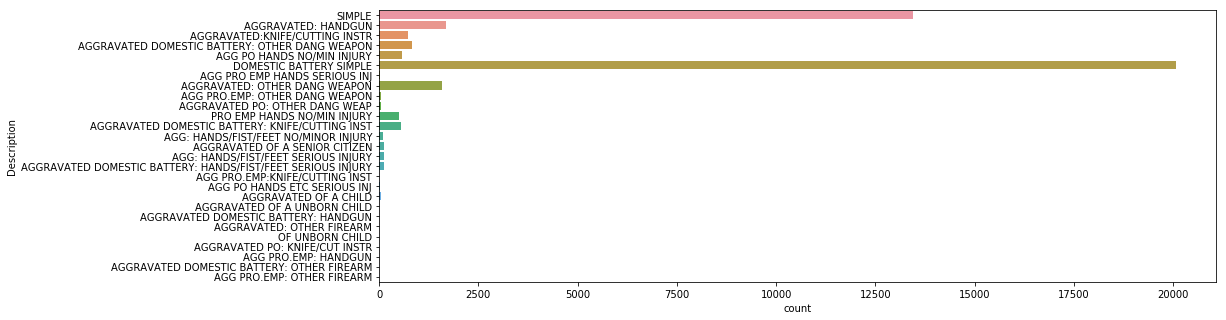

In [123]:
plot.figure(figsize = (15,5))
sea.countplot(y = rdt['Description'])

In [124]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)         
rdt_data.head()

,Counts,Description
0,20075,DOMESTIC BATTERY SIMPLE
1,13456,SIMPLE
2,1675,AGGRAVATED: HANDGUN
3,1595,AGGRAVATED: OTHER DANG WEAPON
4,835,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON


In [125]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
battery_in_months = pd.DataFrame({"Battery" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [128]:
battery_in_months.fillna(0, inplace=True)
battery_in_months = battery_in_months.sort_values(['month'], ascending=[1])     

In [129]:
battery_in_months.head()

,Battery,month
11,3594.0,1
10,4086.0,2
9,4311.0,3
5,4954.0,4
0,0.0,5


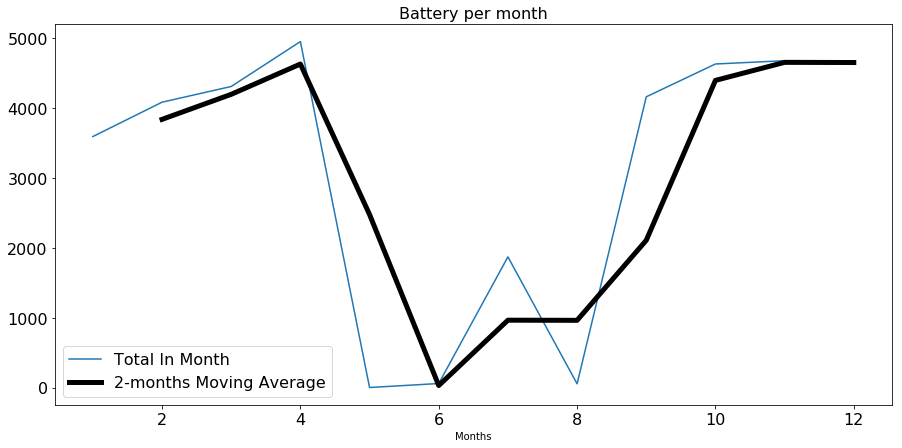

In [130]:
#graph to analyse the monthly trend of battery crimes
plt.figure(figsize = (15,7))
plt.plot(battery_in_months['month'],battery_in_months['Battery'], label = 'Total In Month')
plt.plot(battery_in_months['month'],battery_in_months['Battery'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Battery per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [131]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2015-12-31 23:55:00
2011-01-02 21:20:00


In [132]:
rdt['Date'].iloc[0].date()

datetime.date(2015, 3, 21)

In [133]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/Users/srivatsasrinathmurthy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

In [134]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

In [136]:
# analysing the homicide crimes
rdt = rd[rd['Primary Type'] == 'HOMICIDE']               

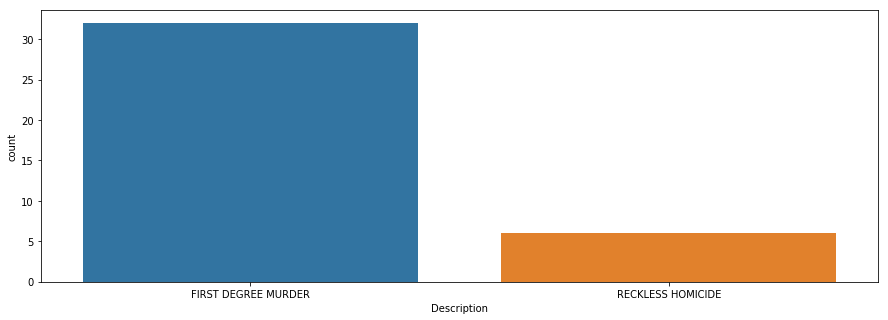

In [137]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [138]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,32,FIRST DEGREE MURDER
1,6,RECKLESS HOMICIDE


In [139]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/3/2015 19:28
1/19/2012 1:10


In [140]:
rdt = rd[rd['Primary Type'] == 'DECEPTIVE PRACTICE']        

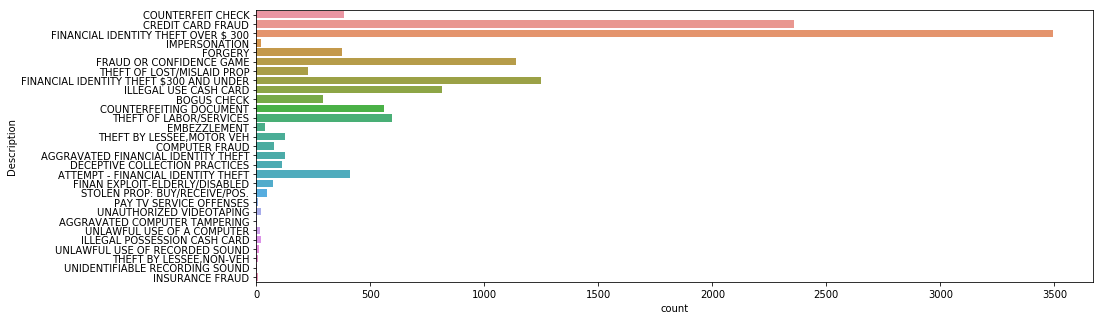

In [141]:
plot.figure(figsize = (15,5))
sea.countplot(y = rdt['Description'])

In [142]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)          #sorting the counts
rdt_data.head()

,Counts,Description
0,3496,FINANCIAL IDENTITY THEFT OVER $ 300
1,2358,CREDIT CARD FRAUD
2,1250,FINANCIAL IDENTITY THEFT $300 AND UNDER
3,1141,FRAUD OR CONFIDENCE GAME
4,814,ILLEGAL USE CASH CARD


In [143]:
#minimum and maximum crimes commited day
print(max(rdt['Date']))
print(min(rdt['Date']))

9/9/2015 9:00
1/1/2011 0:00


In [144]:
rdt = rd[rd['Primary Type'] == 'CRIM SEXUAL ASSAULT']             #Analysing sexual assault

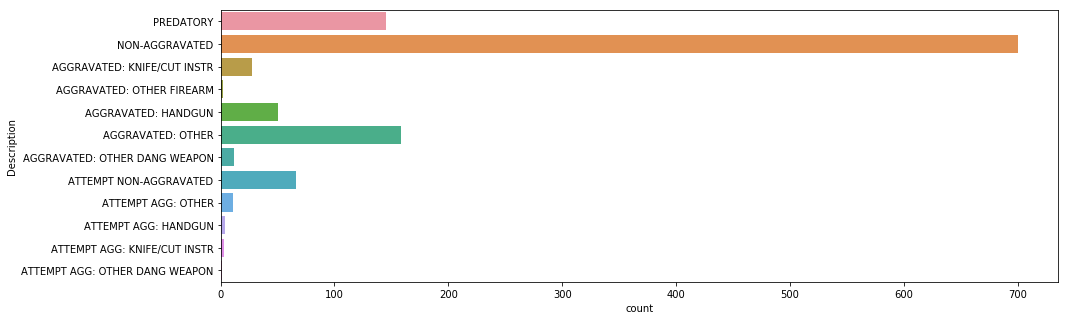

In [145]:
plot.figure(figsize = (15,5))
sea.countplot(y = rdt['Description'])

In [146]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)           #sorting the counts
rdt_data.head()

,Counts,Description
0,700,NON-AGGRAVATED
1,158,AGGRAVATED: OTHER
2,145,PREDATORY
3,66,ATTEMPT NON-AGGRAVATED
4,50,AGGRAVATED: HANDGUN


In [147]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/9/2015 0:25
1/1/2012 0:00
